In [1]:
#image processing whit computer vision in python
#just python it
#script by @rikardoroa
#Data Engineer in formation
import cv2
import numpy as np
import matplotlib.pyplot as ptl


class opencv_processing:
        #init variables and conventions
    def __init__(self, alpha=int  ,beta=int , img=np.array, img2 = np.array, mask=np.array, color=tuple):
        
        self.alpha = alpha
        self.beta = beta
        self.img = img
        self.img2 = img2
        self.mask = mask
        self.color = color
     
    #load germany flag
    #alpha between 1 an 3
    #beta between 1 an 100
    def load_img(self,alpha=int,beta=int):
            
        alpha = self.alpha
        beta  = self.beta
        img1 = cv2.imread("germany.jpg")
        img1 = cv2.convertScaleAbs(img1, alpha=alpha, beta=beta)
        img1= cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
        self.img = img1
        return ptl.imshow(img1)
    
    # draw a simple green background image
    def draw_image(self):
            
        rgb_shape=np.array((72, 245, 66),np.uint8)[::-1]
        img2 = np.full((480,800,3),rgb_shape)
        img2 = cv2.imwrite("green.jpg",img2)
        img2 = cv2.imread("green.jpg")
        self.img2 = img2
        return ptl.imshow(img2)
    
    #Detect the yellow color of germany flag.
    
    def yellow_color_detection(self):
        
        lower_yellow = np.array([255,0,0])
        upper_yellow = np.array([255,220,31])
        yellow_mask = cv2.inRange(self.img,lower_yellow,upper_yellow)
        mask = cv2.bitwise_or(self.img,self.img,mask=yellow_mask)
        black_yellow = cv2.imwrite('black_yellow.jpg', cv2.cvtColor(mask, cv2.COLOR_RGB2BGR)) 
        black_yellow_read = cv2.imread('black_yellow.jpg')
        black_yellow_read = cv2.cvtColor(black_yellow_read,cv2.COLOR_BGR2RGB)
        self.img = black_yellow_read
        return ptl.imshow(black_yellow_read)
    
    #bitwise or operatation for masking the germany flag for yellow color detection (previously function)
    
    def masking_yellow_green(self):
        
        mask_green_yellow = cv2.bitwise_or(self.img,self.img2)
        green_yellow = cv2.imwrite('green_yellow_mask.jpg', cv2.cvtColor(mask_green_yellow, cv2.COLOR_RGB2BGR)) 
        green_yellow_load = cv2.imread('green_yellow_mask.jpg')
        green_yellow_load = cv2.cvtColor(green_yellow_load, cv2.COLOR_BGR2RGB)
        self.img = green_yellow_load
        return ptl.imshow(green_yellow_load)
    
        # load the python logo and for masking application with bitwise operations
    def load_logo(self,alpha=int,beta=int):
        green_yellow_load = self.img
        alpha = self.alpha
        beta  = self.beta
        python_logo = cv2.imread("pythonslogo.png")#here it is my python logo
        resized_logo = cv2.resize(python_logo,(800,480))
        resized_logo = cv2.convertScaleAbs(resized_logo, alpha=alpha, beta=beta)
        resized_img =  cv2.imwrite('resize.jpg', cv2.cvtColor(resized_logo, cv2.COLOR_RGB2BGR)) 
        resized_img = cv2.imread('resize.jpg')
        resized_img_gray = cv2.cvtColor(resized_img,cv2.COLOR_RGB2GRAY)#start the masking from here
        resized_img_inv = cv2.bitwise_not(resized_img_gray)
        resized_img_inv_shape = np.full(resized_img.shape,255,dtype=np.uint8)
        mask_gray_inv = cv2.bitwise_or(resized_img_inv_shape,resized_img_inv_shape, mask=resized_img_inv)
        resized_mask_inv = cv2.bitwise_or(resized_img,resized_img , mask = resized_img_inv)
        final = resized_mask_inv + cv2.bitwise_or(self.img, mask_gray_inv)
        final = cv2.imwrite('final_combined.jpg', cv2.cvtColor(final, cv2.COLOR_RGB2BGR)) 
        final = cv2.imread('final_combined.jpg')
        final_python_logo = cv2.cvtColor(final, cv2.COLOR_BGR2RGB)
        self.img = final_python_logo
        return ptl.imshow(final_python_logo)
    
    #put some text in function
    def put_some_text(self):
        color = 168,50,50
        self.color = color
        grosor_linea = 2
        text = cv2.putText(self.img, 'R.Roa Love be a Pythonista, just python it!!!', (50,50), None, 1, self.color , grosor_linea, cv2.LINE_AA) 
        text_img = cv2.imwrite('final_text_logo.jpg', cv2.cvtColor(text, cv2.COLOR_RGB2BGR)) 
        text_img = cv2.imread('final_text_logo.jpg')
        text_final_img = cv2.cvtColor(text_img, cv2.COLOR_BGR2RGB)
        return ptl.imshow(text_final_img)
        
        
    
        
            
            
        
        

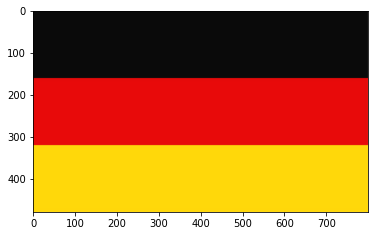

In [2]:
load = opencv_processing(1,10)
load.load_img()

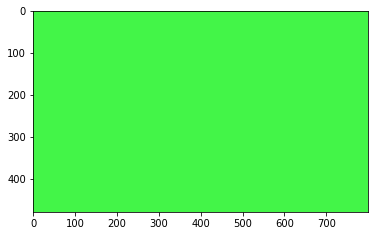

In [3]:
load.draw_image()

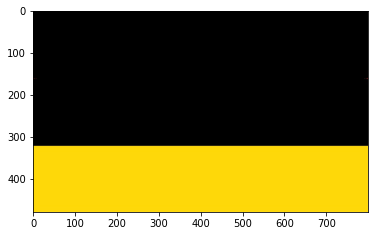

In [4]:
load.yellow_color_detection()

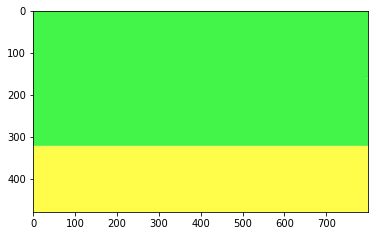

In [5]:
load.masking_yellow_green()

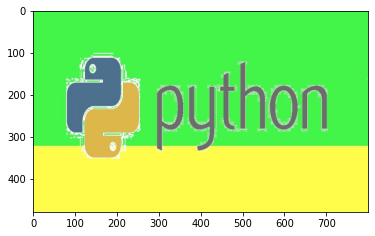

In [6]:
load.load_logo()

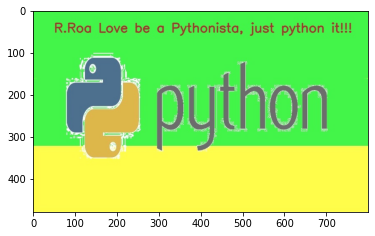

In [7]:
load.put_some_text()